# 2. Fundamentos de IA

- Introducción a la IA
- Tipos de IA
- Campos de aplicación de la IA
- Introducción al aprendizaje automático
    - Historia de la IA
    - Aprendizaje del perceptron
    - ¿Dónde encontrar datos para entrenar?


## Introducción a la Inteligencia Artificial

![](https://raw.githubusercontent.com/igomezv/DataScienceIntermedio/main/img/kasparov.jpeg)
Fuente de la imagen: britannica.com

![](https://raw.githubusercontent.com/igomezv/DataScienceIntermedio/main/img/alphago.png)
Fuente de la imagen: qz.com/877721


### Qué es la Inteligencia Artificial?

    "Es la ciencia y la ingeniería de fabricar máquinas inteligentes, especialmente programas informáticos inteligentes. Está relacionado con la tarea similar de usar computadoras para comprender la inteligencia humana, pero la IA no tiene que limitarse a métodos que son biológicamente observables". 

John McCarthy (2004) What is artificial intelligence.

![](https://raw.githubusercontent.com/igomezv/DataScienceIntermedio/main/img/VennIA2.png)
Fuente de la imagen: Gonzalez Viejo, et al (2019). Emerging technologies based on artificial intelligence to assess quality and consumer preference of beverages. Beverages. 5. 

![](https://raw.githubusercontent.com/igomezv/DataScienceIntermedio/main/img/vennIA.png)
Fuente de la imagen: Gmggroup.org

## Tipos de IA
Fuente de las siguientes 3 figuras: https://learnetutorials.com/artificial-intelligence/types-of-artificial-intelligence

![](https://raw.githubusercontent.com/igomezv/DataScienceIntermedio/main/img/types-ai.png)

![](https://raw.githubusercontent.com/igomezv/DataScienceIntermedio/main/img/types-ai1.png)

![](https://raw.githubusercontent.com/igomezv/DataScienceIntermedio/main/img/types-ai2.png)

## Campos de aplicación de la IA

![](https://raw.githubusercontent.com/igomezv/DataScienceIntermedio/main/img/ia_apps1.jpg)
Fuente de la imagen: europarl.europa.eu

![](https://raw.githubusercontent.com/igomezv/DataScienceIntermedio/main/img/ia_apps2.jpg)
Fuente de la imagen: https://contaduriapublica.org.mx/2019/08/01/inteligencia-artificial/

## Introducción al aprendizaje automático

### Un poco de historia


![](https://raw.githubusercontent.com/igomezv/MACS_2021_ML_basics_neural_networks/main/figures/timeline.png)


### 1943. Modelo lógico para una neurona de McCulloch-Pitts 

![](https://images.computerhistory.org/timeline/timeline_computers_1939.hewlettpackard.jpg)

![](https://raw.githubusercontent.com/igomezv/MACS_2021_neural_networks/main/figures/ANN.png)

Compuertas lógicas: 

![](https://raw.githubusercontent.com/igomezv/MACS_2021_ML_basics_neural_networks/main/figures/compuertas.png)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def fn_activacion(mensaje, pesos, umbral):    
    x = mensaje
    sum_ = np.inner(pesos, x)

    if sum_ >= umbral:
        return 1
    else:
        return 0

def neurona(senal_entrada, etiquetas_entrada, 
            etiqueta_salida, pesos = [1,1], umbral = 1):
    pesos = np.array(pesos)
    umbral = umbral
        
    tabla_logica = pd.DataFrame(senal_entrada, columns = etiquetas_entrada)
    senal_salida = []
    
    for senal in senal_entrada:
        signal = fn_activacion(senal, pesos, umbral)
        senal_salida.append(signal)
            
    tabla_logica[etiqueta_salida] = pd.Series(senal_salida)
    
    return tabla_logica

In [3]:
entradas = np.array([[0,0], [0,1], [1,0], [1,1]])
etiquetas_in = ['x1', 'x2']
etiquetas_out = 'y'

OR = neurona(entradas, etiquetas_in, etiquetas_out, pesos = [1,1], umbral = 1)

print(OR)

   x1  x2  y
0   0   0  0
1   0   1  1
2   1   0  1
3   1   1  1


In [4]:
entradas = np.array([[0,0], [0,1], [1,0], [1,1]])
etiquetas_in = ['x1', 'x2']
etiquetas_out = 'y'

NAND = neurona(entradas, etiquetas_in, etiquetas_out, pesos = [-1,-1], umbral = -1)

print(NAND)

   x1  x2  y
0   0   0  1
1   0   1  1
2   1   0  1
3   1   1  0


In [5]:
entradas = np.array([[0,0], [0,1], [1,0], [1,1]])
etiquetas_in = ['x1', 'x2']
etiquetas_out = 'y'

NOR = neurona(entradas, etiquetas_in, etiquetas_out, pesos = [-1,-1], umbral = 0)

print(NOR)

   x1  x2  y
0   0   0  1
1   0   1  0
2   1   0  0
3   1   1  0


### -> Ejercicio 1 (opcional)

Encuentra la configuración correcta del modelo neuronal de McCulloch-Pitts para las copuertas lógicas XNOR y AND

# 1957 Perceptron

![](https://news.cornell.edu/sites/default/files/styles/story_thumbnail_xlarge/public/2019-09/0925_rosenblatt_main.jpg?itok=SE0aS7ds)

![](https://raw.githubusercontent.com/igomezv/MACS_2021_neural_networks/main/figures/perceptron_rule.png)

In [6]:
class Perceptron:
    def __init__(self, alpha = 0.01, umbral = 0, intercepto = True, epocas = 10):
        self.alpha = alpha
        self.umbral = umbral
        self.intercepto = intercepto
        self.epocas = epocas
        
        
    def aprender(self, X, y):
        """
        Algoritnmo de aprendizaje del Perceptron para aprender los pesos del clasificador.
        
        Parametros
        ----------
        X : array-like, shape = [N, m]
            Entradas de entrenamiento.
        y : array-like, shape = [N, 1]
            Etiquetas de entrenamiento.
        """
        
        N = X.shape[0]
        
        if self.intercepto:
            X = np.concatenate((np.ones([N,1]), X), axis = 1)
            
        m = X.shape[1]
        
        self.w_ = self.inicializar(m)
        self.errores_ = []
        
        for ep in range(self.epocas):
            errores = 0
            print("Epoca {}/{}".format(ep+1, self.epocas), end='\r')
            
            for x_n, y_n in zip(X,y):
                x_n = x_n.reshape((m, 1))
                update = self.alpha*(y_n - self.predecir(x_n))*x_n
                self.w_ += update
                errores += np.sum(update != 0.0)/(m)
                
            self.errores_.append(errores)
            
   
    
    def inicializar(self, m):
        """Inicializar vector con pesos igual a cero"""
        return np.zeros([m, 1])
    
    
    def predecir(self, x):
            """Función de activación Heaviside"""
            return np.where(np.dot(self.w_.T, x) >= self.umbral, 1, -1)

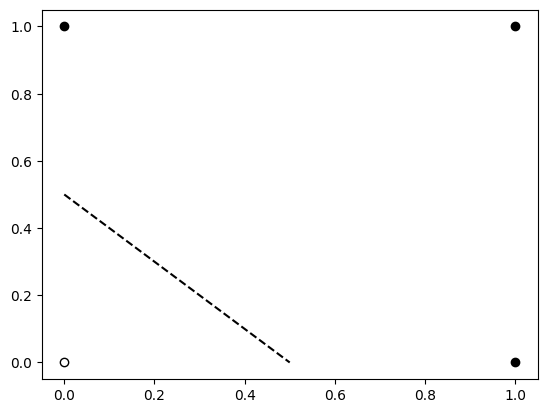

In [7]:
OR = np.array([[0,0,0], [0,1,1], [1,0,1], [1,1,1]])

OR_pcptrn = Perceptron(alpha=0.1, umbral=0.5, intercepto = False, epocas=10)
OR_pcptrn.aprender(X = OR[:,0:2], y = OR[:,2:])

# OR Gate Decision Boundery
plt.scatter(OR[1:,0], OR[1:,1], color='black', marker = 'o')
plt.scatter(OR[0,0], OR[0,1], color='white', edgecolor = 'black', marker='o')

xx = np.linspace(0.0, 0.5)
w = OR_pcptrn.w_
a = 0.5
b = -w[0]/w[1]
yy = a + b*xx

plt.plot(xx, yy, '--', color = 'black')

plt.show()


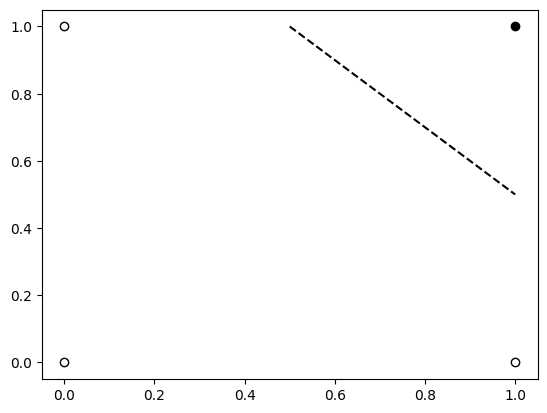

In [8]:
AND = np.array([[0,0,0], [0,1,0], [1,0,0], [1,1,1]])

AND_pcptrn = Perceptron(alpha=0.1, umbral=1.5, intercepto = False, epocas=10)
AND_pcptrn.aprender(X = AND[:,0:2], y = AND[:,2:])

# OR Gate Decision Boundery
plt.scatter(AND[3,0], AND[3,1], color='black', marker = 'o')
plt.scatter(AND[:3,0], AND[:3,1], color='white', edgecolor = 'black', marker='o')

xx = np.linspace(0.5, 1)
w = AND_pcptrn.w_
a = 1.5
b = -w[0]/w[1]
yy = a + b*xx

plt.plot(xx, yy, '--', color = 'black')

plt.show()

### Ejercicio: Usar el perceptron para hacer la clasificacion binaria de: https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/ Por simplicidad, solamente considerar dos atributos.

In [9]:
file = 'https://raw.githubusercontent.com/igomezv/DataScienceIntermedio/main/datasets/binary_cancer/breast-cancer-wisconsin.data'
data_bcancer = pd.read_csv(file)
data_bcancer.head()

,clumb-thick,ucellsize,ucellshape,margadh,singlepcellsize,barenuclei,blandchr,normalnucleoli,mitoses,class
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2


Solucion: Buscar las variables menos correlacionadas, es decir, las mas alejadas de 1.

In [10]:
data_bcancer.corr()

/tmp/ipykernel_26646/2379217958.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_bcancer.corr()


,clumb-thick,ucellsize,ucellshape,margadh,singlepcellsize,blandchr,normalnucleoli,mitoses,class
clumb-thick,1.000000,0.644913,0.654589,0.486356,0.521816,0.558428,0.535835,0.350034,0.716001
ucellsize,0.644913,1.000000,0.906882,0.705582,0.751799,0.755721,0.722865,0.458693,0.817904
ucellshape,0.654589,0.906882,1.000000,0.683079,0.719668,0.735948,0.719446,0.438911,0.818934
margadh,0.486356,0.705582,0.683079,1.000000,0.599599,0.666715,0.603352,0.417633,0.696800
singlepcellsize,0.521816,0.751799,0.719668,0.599599,1.000000,0.616102,0.628881,0.479101,0.682785
blandchr,0.558428,0.755721,0.735948,0.666715,0.616102,1.000000,0.665878,0.344169,0.756616
normalnucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.665878,1.000000,0.428336,0.712244
mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.344169,0.428336,1.000000,0.423170
class,0.716001,0.817904,0.818934,0.696800,0.682785,0.756616,0.712244,0.423170,1.000000


In [11]:
np.min(data_bcancer.corr())

/tmp/ipykernel_26646/1336524906.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  np.min(data_bcancer.corr())
/home/isidro/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


clumb-thick        0.350034
ucellsize          0.458693
ucellshape         0.438911
margadh            0.417633
singlepcellsize    0.479101
blandchr           0.344169
normalnucleoli     0.428336
mitoses            0.344169
class              0.423170
dtype: float64

Es blandchr con mitoses: 0.344169

In [12]:
data_bcancer_filter = data_bcancer[['blandchr', 'mitoses', 'class']]
data_bcancer_filter

,blandchr,mitoses,class
1000025,3,1,2
1002945,3,1,2
1015425,3,1,2
1016277,3,1,2
1017023,3,1,2
...,...,...,...
776715,1,1,2
841769,1,1,2
888820,8,2,4
897471,10,1,4


In [13]:
X = data_bcancer_filter.values[:,:2]
Y = data_bcancer_filter.values[:, 2].reshape(-1,1)
np.shape(X), np.shape(Y)

((699, 2), (699, 1))

In [14]:
from sklearn.preprocessing import MinMaxScaler
scalerx = MinMaxScaler(feature_range=(-1,1))
scalerx.fit(X)
X = scalerx.transform(X)

#### Como el la funcion escalon pasa de -1 a 1, las clases de Y hay que convertirlas de 2 a 4 a-1 y 1 respectivamente

In [15]:
Y = np.where(Y == 2, -1, 1)

Si nos fijamos en la suma ponderada, tenemos que la salida de la neurona antes de pasar por la funcion de activacion, es:

$$w_1x_1+w_2x_2+w_3$$,

donde $w_3$ es el bias; igualamos a cero, que es nuestro umbral:

$$w_1x_1+w_2x_2+w_3=0$$

Lo que queremos graficar es $x_1$ vs $x_2$, asi que despejamos $x_2$:

$$x_2 = -\frac{w_1}{w_2}x - \frac{w_3}{w_2}$$

Dado que en python los indices inician en 0 $w_1$ es w[0],  $w_2$ es w[1] y  $w_3$ es w[2].

In [16]:
pereceptron_cancer = Perceptron(alpha=1e-4, umbral=0, intercepto=True, epocas=100)

[[0.0006    ]
 [0.00086667]
 [0.00028889]]
[-0.69230769] [-0.33333333]


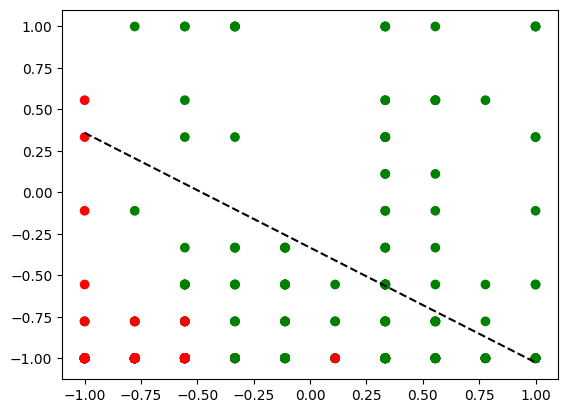

In [17]:


# usacmos los datos estandarizados para entrenar
pereceptron_cancer.aprender(X = X, y = Y)


# mascara OR para colorear diferentes clases
color= ['red' if l == -1 else 'green' for l in Y]

plt.scatter(X[:,0], X[:,1], label='cancer dataset', color=color, marker = 'o')

xx1 = np.linspace(min(X[:,0]), max(X[:,0]))
w = pereceptron_cancer.w_
print(w)
m = -w[0]/w[1]
b = -w[2]/w[1]
print(m,b)
xx2 = m*xx1+b

plt.plot(xx1, xx2, '--', color = 'black')

plt.show()

## Introducción al Aprendizaje Automático

![](https://raw.githubusercontent.com/igomezv/DataScienceIntermedio/main/img/ML_grafo.jpg)
Fuente de la imagen: medium.com

![](https://raw.githubusercontent.com/igomezv/DataScienceIntermedio/main/img/ML_tipos.png)
Fuente de la imagen: mlearninglab.com


![](https://raw.githubusercontent.com/igomezv/DataScienceIntermedio/main/img/ML_pipeline.png)
Fuente de la imagen: Western Digital


### Separacion del conjunto de datos

Si se tienen pocos datos:
![](https://raw.githubusercontent.com/igomezv/DataScienceIntermedio/main/img/split_data.png)

Si hay datos suficientes:
![](https://raw.githubusercontent.com/igomezv/DataScienceIntermedio/main/img/split_data2.png)

Fuente de las figuras: https://vitalflux.com/hold-out-method-for-training-machine-learning-model/

## Actividad, leer la base de datos usada anteriormente, revolver aleatoreamente sus valores y dividir en tres conjuntos, uno con el 70% y los otros dos con 15% cada uno.

In [18]:
data_bcancer.head()

,clumb-thick,ucellsize,ucellshape,margadh,singlepcellsize,barenuclei,blandchr,normalnucleoli,mitoses,class
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2


In [19]:
from sklearn.model_selection import train_test_split
## Primero separamos el conjunto de entrenamiento con 75% y otro temporal con el 25% 
data_train, data_temp = train_test_split(data_bcancer.values, train_size=0.75, shuffle=True)
## El temporal lo partimos en dos partes iguales para obtener conjuntos de validacion y de prueba
data_val, data_test = train_test_split(data_temp, test_size=0.5, shuffle=True)
## Separamos X y Y para cada nuevo conjunto
X_train, Y_train = data_train[:,:-1], data_train[:,-1]
X_val, Y_val = data_val[:,:-1], data_val[:,-1]
X_test, Y_test = data_test[:,:-1], data_test[:,-1]
## Verificamos tamanos
np.shape(X_train), np.shape(X_test), np.shape(X_val), np.shape(Y_train), np.shape(Y_test), np.shape(Y_val)

((524, 9), (88, 9), (87, 9), (524,), (88,), (87,))

Intentemos usar nuestros datos para un modelo sencillo con sklearn

In [20]:
from sklearn.linear_model import Perceptron
clf = Perceptron(tol=0.001, random_state=0)
clf.fit(X_train, Y_train)

ValueError: could not convert string to float: '?'

Por qué marca error? Parece que nuestra base de datos tiene un "?". Hay que detectarlo y quitarlo como en la primera clase.

In [21]:
cols = data_bcancer.columns

df_clean = data_bcancer[cols].apply(pd.to_numeric, errors='coerce').fillna(0)
df_clean.head(5)

,clumb-thick,ucellsize,ucellshape,margadh,singlepcellsize,barenuclei,blandchr,normalnucleoli,mitoses,class
1000025,5,1,1,1,2,1.0,3,1,1,2
1002945,5,4,4,5,7,10.0,3,2,1,2
1015425,3,1,1,1,2,2.0,3,1,1,2
1016277,6,8,8,1,3,4.0,3,7,1,2
1017023,4,1,1,3,2,1.0,3,1,1,2


Volvemos a separar nuestro dataset

In [22]:
## Primero separamos el conjunto de entrenamiento con 75% y otro temporal con el 25% 
data_train, data_temp = train_test_split(df_clean.values, train_size=0.75, shuffle=True)
## El temporal lo partimos en dos partes iguales para obtener conjuntos de validacion y de prueba
data_val, data_test = train_test_split(data_temp, test_size=0.5, shuffle=True)
## Separamos X y Y para cada nuevo conjunto
X_train, Y_train = data_train[:,:-1], data_train[:,-1]
X_val, Y_val = data_val[:,:-1], data_val[:,-1]
X_test, Y_test = data_test[:,:-1], data_test[:,-1]
## Verificamos tamanos
np.shape(X_train), np.shape(X_test), np.shape(X_val), np.shape(Y_train), np.shape(Y_test), np.shape(Y_val)

((524, 9), (88, 9), (87, 9), (524,), (88,), (87,))

Volvemos a probar

In [23]:
clf = Perceptron(tol=0.001, random_state=0)
clf.fit(X_train, Y_train)

Perceptron()

Probamos su metrica, en este caso su exactitud:

In [24]:
clf.score(X_test, Y_test)

0.9204545454545454

In [25]:
clf.predict(np.array([3,1,1,1,2,2.0,3,1,0]).reshape(1,-1))

array([2.])


## Referencias

- McCulloch, W. S., & Pitts, W. (1943). A logical calculus of the ideas immanent in nervous activity. The bulletin of mathematical biophysics, 5(4), 115-133. 

- Rosenblatt, F. (1958). The perceptron: a probabilistic model for information storage and organization in the brain. Psychological review, 65(6), 386.

- https://jontysinai.github.io/jekyll/update/2017/09/24/the-mcp-neuron.html

- https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html 

 https://vitalflux.com/hold-out-method-for-training-machine-learning-model/